<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
محموله‌ی بزرگ
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
  در اولین گام از پروژه فرض کنیم یک محموله‌ی بزرگ از شکلات‌های خارجی برای‌مان آمده و خوشبختانه فروشنده نیز لیستی از مشخصات کامل هر شکلات را در اختیارمان قرار داده است. حال می‌خواهیم به بررسی بیشتر این مشخصات پرداخته و مقداری ساختار ذخیره‌سازی این اطلاعات را بهبود دهیم.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
مجموعه‌داده
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
    اطلاعات شکلات‌ها در فایلی به نام <code>chocolate.csv</code> در اختیار شما قرار گرفته است. پیش از هر چیز به کمک سلول زیر این اطلاعات را به شکل یک دیتافریم بخوانیم.
</font>
</p>


In [52]:
import numpy as np
import pandas as pd

df = pd.read_csv('chocolate.csv')
df.head()

,Company,Specific Bean\nOrigin,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,2016,63%,France,3.75,Blend,Sao Tome
1,A. Morin,Kpime,2015,70%,France,2.75,Blend,Togo
2,A. Morin,Atsane,2015,70%,France,3.00,Blend,Togo
3,A. Morin,Akata,2015,70%,France,3.50,Blend,Togo
4,A. Morin,Quilla,2015,70%,France,3.50,Blend,Peru


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
قسمت اول
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
  برای این که به حجم زیاد شکلات‌ها و مشخصات دقیق‌تر آن‌ها پی ببریم ابعاد (shape) و نام ستون‌های این مجموعه‌داده (columns) را در متغیر‌های زیر ریخته و چاپ کنید:
</font>
</p>


In [53]:
s = df.shape
cols = df.columns
print(s)
print(cols)

(1795, 8)
Index(['Company', 'Specific Bean\nOrigin', 'Review\nDate', 'Cocoa\nPercent',
       'Company\nLocation', 'Rating', 'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
قسمت دوم
</font>
</h2>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
همان‌طور که دیدید، نام برخی از ستون‌ها دارای کاراکتر <code>n\</code> است که برای ایجاد خط جدید استفاده می‌شود اما در اینجا به آن‌صورت نمایش داده نمی‌شود. پس برای مرتب شدن مجموعه‌داده، نام ستون‌ها را به نوعی تغییر دهید که به جای کاراکتر <code>n\</code>، تنها از فاصله (space) استفاده شود.
</font>
</p>


In [54]:
df.columns = [x.replace('\n', ' ') for x in df.columns]

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
با استفاده از دستور <code dir=ltr>info()</code> می‌توانیم اطلاعات کلی دیتافریم و نوع (type) ستون‌های آن را مشاهده کنیم.
پیشنهاد می‌کنیم پیش از ادامه، به کمک این دستور نگاهی به دیتافریم بی‌اندازید و کمی آن را تحلیل کنید.
</font>
</p>


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1795 non-null   object 
 1   Specific Bean Origin  1795 non-null   object 
 2   Review Date           1795 non-null   int64  
 3   Cocoa Percent         1795 non-null   object 
 4   Company Location      1795 non-null   object 
 5   Rating                1795 non-null   float64
 6   Bean Type             1795 non-null   object 
 7   Broad Bean Origin     1794 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 112.3+ KB


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
قسمت سوم
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
همان‌طور که احتمالاً متوجه شده‌اید، تمام ستون‌هایی که دارای مقادیری از نوع رشته (<code>string</code>) هستند (مثل ستون <code>Company</code>)، به صورت <code>object</code> ذخیره شده‌اند که به دلیل نداشتن مقادیر خالی (که در فصل آینده با آن آشنا می‌شوید)، لزومی ندارد این ستون‌ها به صورت <code>object</code> باقی بمانند. برای راحتی محاسبات این ستون‌ها را به نوع رشته تغییر دهید و با دستور <code>info</code> از صحت انجام این کار مطمئن شوید.

</font>
</p>


In [56]:
object_cols = df.select_dtypes(include='object').columns
df[object_cols] = df[object_cols].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1795 non-null   object 
 1   Specific Bean Origin  1795 non-null   object 
 2   Review Date           1795 non-null   int64  
 3   Cocoa Percent         1795 non-null   object 
 4   Company Location      1795 non-null   object 
 5   Rating                1795 non-null   float64
 6   Bean Type             1795 non-null   object 
 7   Broad Bean Origin     1795 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 112.3+ KB


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
قسمت چهارم
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
مشکل بعدی، ستون درصد کاکائوی خالص یعنی <code>Cocoa Percent</code> است. همان‌طور که می‌بینید این ستون در حال حاضر به‌صورت رشته ذخیره شده است، اما مقادیر آن در واقع معنای عددی دارند. پس برای نرمال‌سازی بهتر این ستون، راه‌حلی بیابید تا علامت درصد (<code>%</code>) را از مقادیر حذف کرده و سپس نوع آن ستون را به <code>float</code> تبدیل کنید.

</font>
</p>


In [57]:
df["Cocoa Percent"] = df["Cocoa Percent"].str.replace("%", "").astype(float)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
بررسی فراوانی درصد کاکائو
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
در بسیاری از شرایط، مصورسازی داده می‌تواند به‌سرعت حقایق مهمی را نشان‌مان دهد. به‌عنوان مثال، در اینجا می‌توانیم برای بررسی درصد کاکائو در شکلات‌های مختلف، از نمودار هیستوگرام استفاده کنیم.
<br>
هول نشوید! 😉 به‌زودی در فصل «مصورسازی داده» با انواع نمودارها و نحوه‌ی رسم آن‌ها آشنا می‌شوید.


</font>
</p>


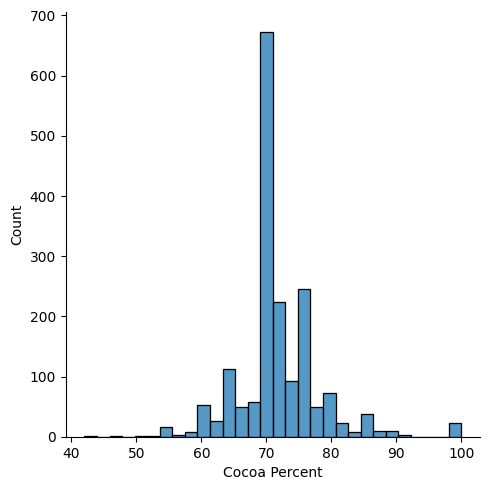

In [58]:
import seaborn as sns
sns.displot(df, x = 'Cocoa Percent', bins = 30)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
با بررسی نمودار بالا مشخص می‌شود که درصد زیادی از شکلات‌ها، دارای ۷۰ درصد کاکائو هستند.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
ذخیره‌سازی داده‌ها
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>
تبریک! 🎉 حالا تمامی مشخصات، مرتب و آماده‌ی تحلیل است.
اکنون نیاز است مجموعه‌داده‌ی پیش‌پردازش‌شده را در فایلی به نام <code>chocolate_preprocessed.csv</code> و بدون نمایه (<code>index</code>) ذخیره کنید تا بتوانید در مرحله‌ی بعدی از آن استفاده کنید.
</font>
</p>


In [59]:
df.to_csv('chocolate_preprocessed.csv', index=False)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazirmatn" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [60]:
import zlib
import zipfile

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

np.savez("answers.npz",s = s,cols = cols)
file_names = ["answers.npz", "project1_step1.ipynb", "chocolate_preprocessed.csv"]
compress(file_names)

File Paths:
['answers.npz', 'project1_step1.ipynb', 'chocolate_preprocessed.csv']
